# TASK1

1.Read the dataset from the below link
https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_
Names/US_Baby_Names_right.csv

In [1]:
import pandas as pd
dataframe=pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv",sep=',')
dataframe.head()

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41


1. Delete unnamed columns

In [2]:
df = dataframe.drop(dataframe.columns[dataframe.columns.str.contains('unnamed',case = False)],axis = 1)
df.head()

,Id,Name,Year,Gender,State,Count
0,11350,Emma,2004,F,AK,62
1,11351,Madison,2004,F,AK,48
2,11352,Hannah,2004,F,AK,46
3,11353,Grace,2004,F,AK,44
4,11354,Emily,2004,F,AK,41


2. Show the distribution of male and female

In [3]:
df['Gender'].value_counts()

F    558846
M    457549
Name: Gender, dtype: int64

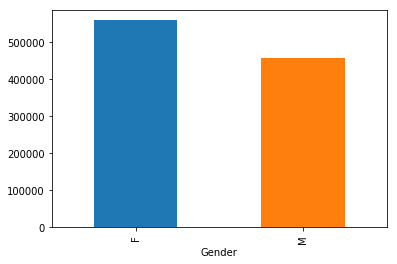

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
groups = df.groupby(['Gender']).size()
groups.plot.bar()
plt.show()

 3. Show the top 5 most preferred names

In [6]:
names = df.groupby("Name").sum()
del names["Year"]
names.shape
val=names.sort_values("Count", ascending = 0).head()
val

,Id,Count
Name,,
Jacob,1665681356,242874
Emma,1629482250,214852
Michael,1687521295,214405
Ethan,1660808475,209277
Isabella,1630131786,204798


4. What is the median name occurence in the dataset

In [7]:
names[names.Count == names.Count.median()]

,Id,Count
Name,,
Aishani,7810526,49
Alara,18841027,49
Alysse,22629405,49
Ameir,21780411,49
Anely,4349541,49
Antonina,27672250,49
Aveline,7982905,49
Aziah,29825407,49
Baily,27406186,49


5. Distribution of male and female born count by states

In [8]:
df1=df.groupby('State')
df1['Gender'].value_counts()

State  Gender
AK     M          2587
       F          2404
AL     F          9878
       M          8419
AR     F          7171
       M          6475
AZ     F         14518
       M         10820
CA     F         45144
       M         31637
CO     F         11424
       M          9183
CT     F          6575
       M          5733
DC     F          3053
       M          3000
DE     F          2549
       M          2440
FL     F         25781
       M         20070
GA     F         19385
       M         15454
HI     M          3546
       F          3255
IA     F          7131
       M          6307
ID     F          4918
       M          4833
IL     F         21268
       M         16828
                 ...  
OK     F          9519
       M          8138
OR     F          8604
       M          7333
PA     F         17480
       M         14171
RI     F          2558
       M          2468
SC     F          9465
       M          8195
SD     M          2908
       F          28

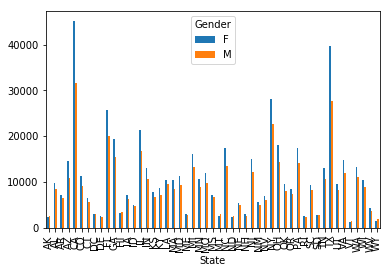

In [9]:
df.groupby(['State','Gender']).size().unstack(fill_value=0).plot.bar()
plt.show()

# TASK2

We have the min and max temperatures in a city In India for each months of the year. We
would like to find a function to describe this and show it graphically, the dataset given below.
Task:
1. fitting it to the periodic function
2. plot the fit
Data
Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

Text(0,0.5,'Min and max temperature')

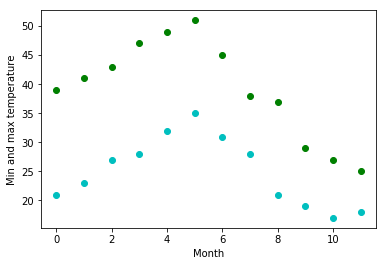

In [10]:
import numpy as np
temp_max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
temp_min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])
import matplotlib.pyplot as plt
months = np.arange(12)
plt.plot(months, temp_max, 'go')
plt.plot(months, temp_min, 'co')
plt.xlabel('Month')
plt.ylabel('Min and max temperature')

1. fitting it to the periodic function

In [11]:
%matplotlib inline
from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 1.8 * np.pi / times.max()))
res_max, cov_max = optimize.curve_fit(yearly_temps, months,
                                      temp_max, [40, 20, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,
                                      temp_min, [-40, 20, 0])

2. plot the fit

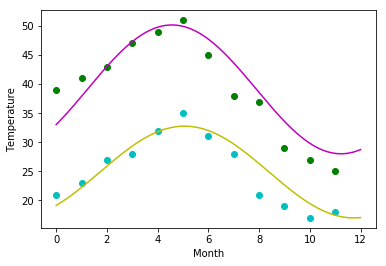

In [12]:
days = np.linspace(0, 12, num=365)
plt.figure()
plt.plot(months, temp_max, 'go')
plt.plot(days, yearly_temps(days, *res_max), 'm-')
plt.plot(months, temp_min, 'co')
plt.plot(days, yearly_temps(days, *res_min), 'y-')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.show()